In [6]:
import numpy as np
import pandas as pd
import keras


In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train.reshape(60000, 28, 28, 1)/255
x_test = x_test.reshape(10000, 28, 28, 1)/255

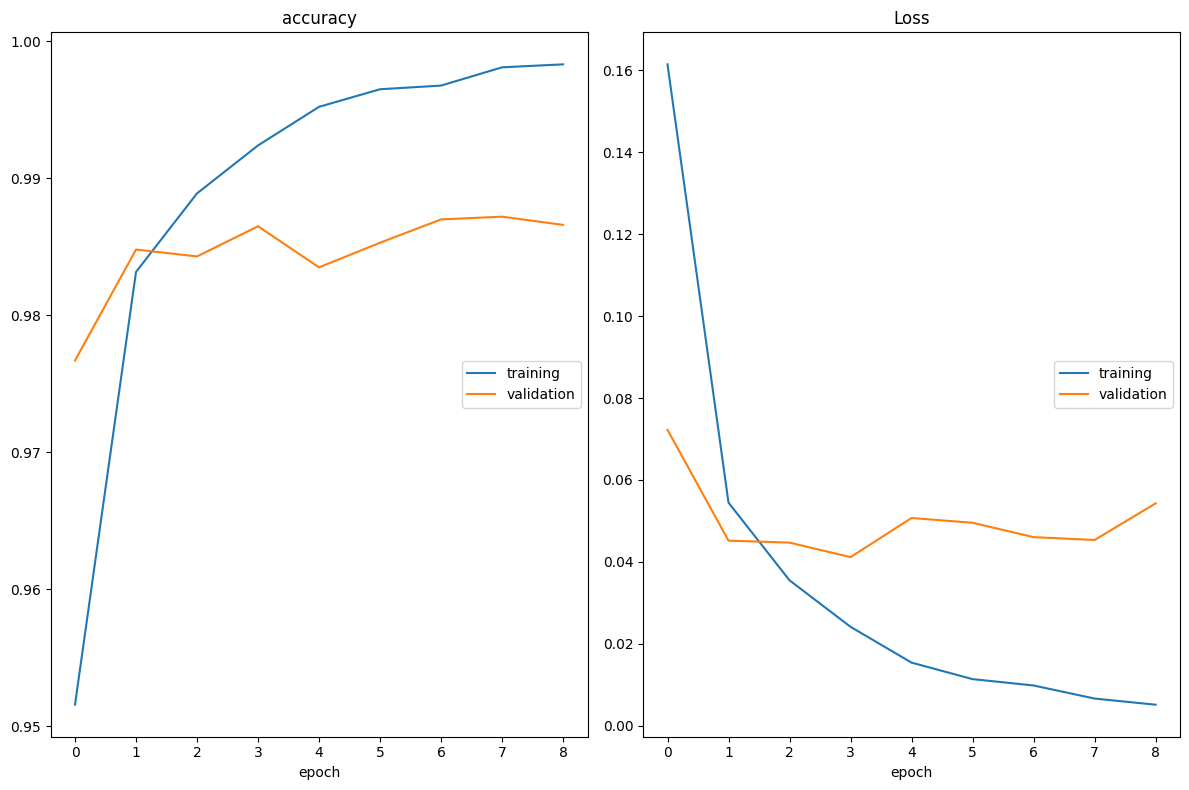

accuracy
	training         	 (min:    0.952, max:    0.998, cur:    0.998)
	validation       	 (min:    0.977, max:    0.987, cur:    0.987)
Loss
	training         	 (min:    0.005, max:    0.161, cur:    0.005)
	validation       	 (min:    0.041, max:    0.072, cur:    0.054)
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9986 - loss: 0.0042 - val_accuracy: 0.9866 - val_loss: 0.0543
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9834 - loss: 0.0664
Final Test Accuracy: 0.9866 
Final Test Loss: 0.0543


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from livelossplot import PlotLossesKeras

model = Sequential()


model.add(Conv2D(filters=28,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

callbacks = [
    keras.callbacks.EarlyStopping(
        monitor='val_loss',
        min_delta=0.0001,
        patience=5,
        verbose=0,
        mode='auto'
    ),
    PlotLossesKeras()
]
model.fit(x_train, y_train, epochs=100, 
          validation_data =(x_test,y_test),
          callbacks=[PlotLossesKeras(),callbacks])


loss, accuracy = model.evaluate(x_test, y_test)
print(f"Final Test Accuracy: {accuracy:.4f}",f"\nFinal Test Loss: {loss:.4f}")

In [12]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (32, 26, 26, 28)       │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 13, 13, 28)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (32, 4732)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 128)              │       605,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 10)               │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,822,184 (6.95 MB)

 Trainable params: 607,394 (2.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,214,790 (4.63 MB)